In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import os


In [2]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [3]:
df = pd.read_pickle('data/processed/train_data.pkl')

## Data

In [4]:
df = df[(np.abs(stats.zscore(df.loc[:,df.columns.values[3:]])) < 2).all(axis=1)].copy()

In [5]:
df.columns.values[0:5]

array(['Batch_ID', 'Gas_ID', 'Gas_Conc', 'sample_no', 's1_f1'],
      dtype=object)

In [6]:
data = df.values

In [7]:
batch_id = data[:,0]
y = data[:,1:3]
X = data[:,3:]

## Scale

In [8]:
scaler = StandardScaler()
scaler = PowerTransformer()

In [9]:
scaler.fit(X)

PowerTransformer()

In [10]:
X_scaled = scaler.transform(X)

# PCA

In [11]:
pca = PCA()
pca.fit(X_scaled)

PCA()

(0.0, 50.0)

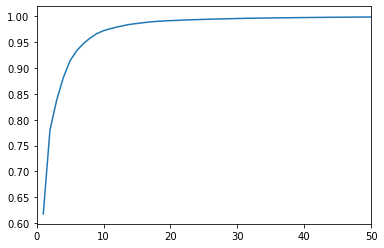

In [12]:
plt.plot(list(range(1,130)),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,50)

In [13]:
len([pca for pca in np.cumsum(pca.explained_variance_ratio_) if pca < .999])

56

In [14]:
X_pca = pca.transform(X)

In [15]:
pca_data = np.concatenate((y,X_pca),axis=1)

In [16]:
pca_df = pd.DataFrame(pca_data, columns=list(df.columns.values[1:3])+['PCA_{}'.format(pca) for pca in range(1,130)])

In [17]:
#pca_df['Gas_Conc'] = pca_df.Gas_Conc.astype(float)

<AxesSubplot:xlabel='PCA_1', ylabel='Gas_Conc'>

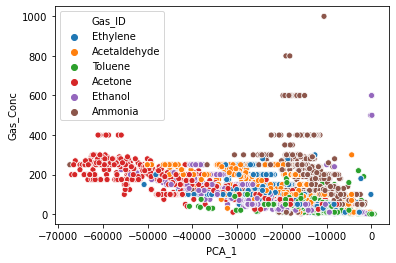

In [18]:
sns.scatterplot(x='PCA_1',y='Gas_Conc',data=pca_df,hue='Gas_ID')

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

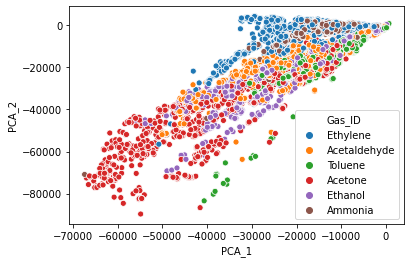

In [19]:
sns.scatterplot(x='PCA_1',y='PCA_2',data=pca_df,hue='Gas_ID')

In [20]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='Gas_Conc',
              color='Gas_ID')
fig.show()

In [21]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='PCA_3',
              color='Gas_ID')
fig.show()

In [22]:
pca.components_[:,0:2]

array([[ 2.64921970e-02, -5.32612673e-02],
       [-2.74639427e-02, -1.47486827e-01],
       [-1.15569844e-01,  5.30735933e-02],
       [-1.06442945e-02,  4.17817317e-02],
       [ 3.40570670e-01, -1.31002201e-01],
       [-2.06686973e-01, -5.13812114e-02],
       [ 1.12518697e-01, -2.32570890e-01],
       [ 9.55207844e-02, -2.16030948e-02],
       [ 6.68557514e-02,  1.44000414e-01],
       [ 2.95444343e-01,  6.15918521e-02],
       [-5.91618341e-02, -9.29418576e-02],
       [-3.26588488e-01,  4.91253527e-02],
       [-2.17642888e-01, -5.18908364e-02],
       [ 8.00987501e-02, -1.02287242e-01],
       [ 6.56115775e-02, -3.81291316e-01],
       [-3.14731229e-01, -1.96728138e-01],
       [ 1.56757051e-01, -3.10224007e-01],
       [ 4.17920796e-01,  4.52955368e-02],
       [-2.78481900e-01, -1.56664988e-01],
       [ 1.72998608e-01,  1.32362911e-02],
       [ 5.97708757e-02, -6.94980294e-02],
       [ 2.92655630e-03, -5.95724925e-03],
       [ 1.29658735e-01,  6.35039140e-03],
       [ 1.

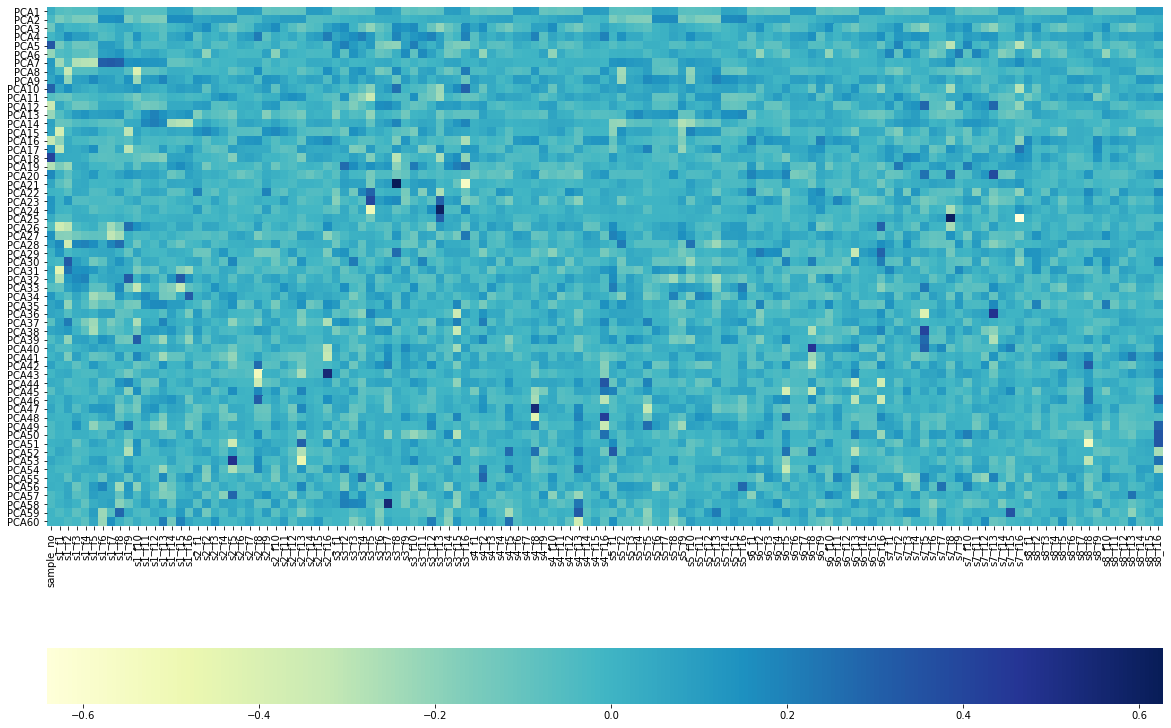

In [23]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(pca.components_[0:60,:],
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,61)],
                 xticklabels=list(df.columns.values[3:]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

(0.0, 150.0)

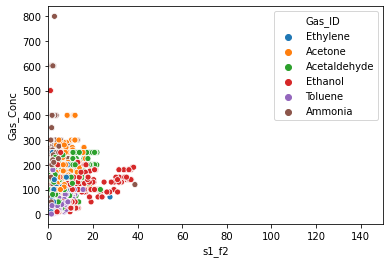

In [27]:
df.Gas_Conc = df.Gas_Conc.astype(float)
sns.scatterplot(x='s1_f2',y='Gas_Conc',data=df,hue='Gas_ID')
plt.xlim(0,150)

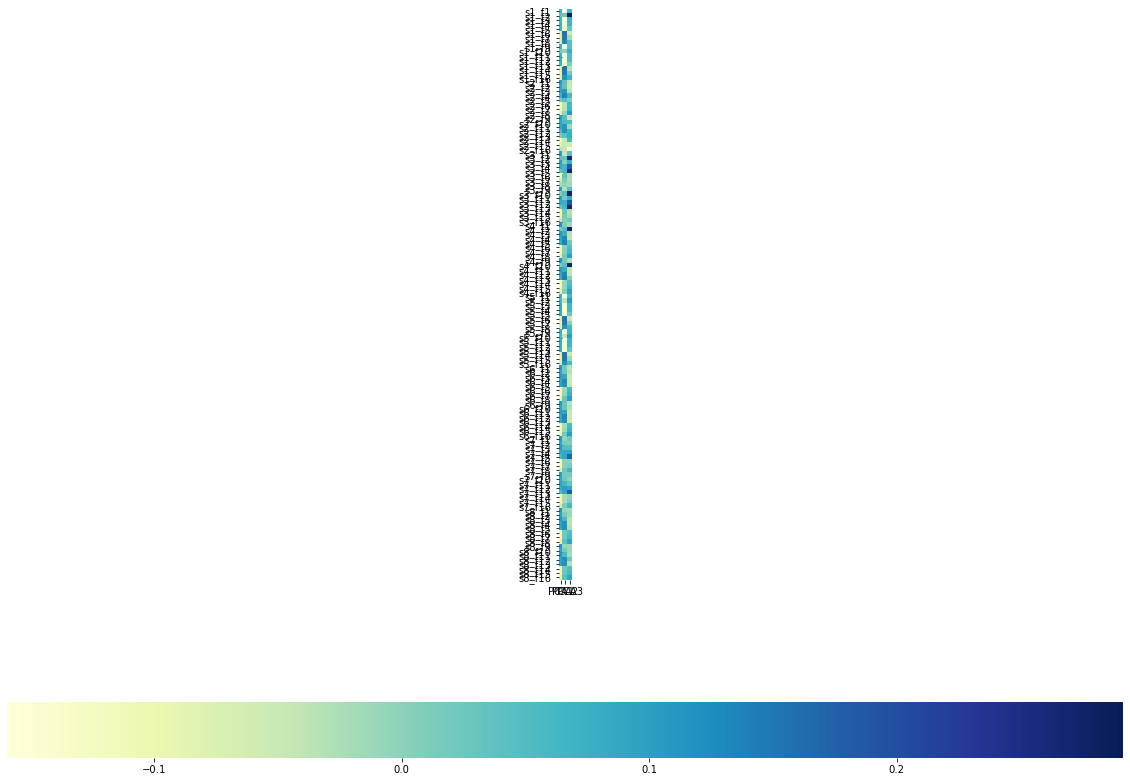

In [77]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(np.transpose(pca2.components_[0:3,:]),
                 cmap='YlGnBu',
                 xticklabels=[ "PCA"+str(x) for x in range(1,4)],
                 yticklabels=list(df.columns.values[3:]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")